我的第一个数据科学项目--《足球运动员身价估计》  
任务类型：回归  
背景介绍：每个足球运动员在转会市场都有自己的价码。本次数据练习的目的是根据球员的各项信息和能力值来预测球员在转会市场上的价值。  
数据来源：FIFA2018  
数据集：  
  - tran.csv 训练集
  - test.csv 预测集
  - sample_submit.csv 提交示例  
  训练集有10441条样本，预测集有7000条样本。每条样本代表一位球员，数据中每个球员有63个属性。  

评价方法：  
  评价标准为MAE（Mean Absolute Error）。若真实值为$y=(y_1,y_2,...,y_n)$，模型的预测值为$\hat y=(\hat y_1,\hat y_2,...,\hat y_n)$，那么该模型的MAE计算公式为：$$MAE=\frac {\sum_{i=1}^n|y_i-\hat y_i|}{n}$$  
MAE越小，说明模型预测越准确。  
变量说明：  

| 变量名 | 解释 |
|:----|:----|
|id|行编号，没有实际意义|
|club|	该球员所属的俱乐部。该信息已经被编码。
|league|	该球员所在的联赛。已被编码。
|birth_date|	生日。格式为月/日/年。
|height_cm|	身高（厘米）
|weight_kg|	体重（公斤）
|nationality|	国籍。已被编码。
|potential|	球员的潜力。数值变量。
|pac|	球员速度。数值变量。
|sho|	射门（能力值）。数值变量。
|pas|	传球（能力值）。数值变量。
|dri|	带球（能力值）。数值变量。
|def|	防守（能力值）。数值变量。
|phy|	身体对抗（能力值）。数值变量。
|international_reputation|	国际知名度。数值变量。
|skill_moves|	技巧动作。数值变量。
|weak_foot|	非惯用脚的能力值。数值变量。
|work_rate_att|	球员进攻的倾向。分类变量，Low, Medium, High。
|work_rate_def|	球员防守的倾向。分类变量，Low, Medium, High。
|preferred_foot|	惯用脚。1表示右脚、2表示左脚。
|crossing|	传中（能力值）。数值变量。
|finishing|	完成射门（能力值）。数值变量。
|heading_accuracy|	头球精度（能力值）。数值变量。
|short_passing|	短传（能力值）。数值变量。
|volleys|	凌空球（能力值）。数值变量。
|dribbling|	盘带（能力值）。数值变量。
|curve|	弧线（能力值）。数值变量。
|free_kick_accuracy|	定位球精度（能力值）。数值变量。
|long_passing|	长传（能力值）。数值变量。
|ball_control|	控球（能力值）。数值变量。
|acceleration|	加速度（能力值）。数值变量。
|sprint_speed|	冲刺速度（能力值）。数值变量。
|agility|	灵活性（能力值）。数值变量。
|reactions|	反应（能力值）。数值变量。
|balance|	身体协调（能力值）。数值变量。
|shot_power|	射门力量（能力值）。数值变量。
|jumping|	弹跳（能力值）。数值变量。
|stamina|	体能（能力值）。数值变量。
|strength|	力量（能力值）。数值变量。
|long_shots|	远射（能力值）。数值变量。
|aggression|	侵略性（能力值）。数值变量。
|interceptions|	拦截（能力值）。数值变量。
|positioning|	位置感（能力值）。数值变量。
|vision|	视野（能力值）。数值变量。
|penalties|	罚点球（能力值）。数值变量。
|marking|	卡位（能力值）。数值变量。
|standing_tackle|	断球（能力值）。数值变量。
|sliding_tackle|	铲球（能力值）。数值变量。
|gk_diving|	门将扑救（能力值）。数值变量。
|gk_handling|	门将控球（能力值）。数值变量。
|gk_kicking|	门将开球（能力值）。数值变量。
|gk_positioning|	门将位置感（能力值）。数值变量。
|gk_reflexes|	门将反应（能力值）。数值变量。
|rw|	球员在右边锋位置的能力值。数值变量。
|rb|	球员在右后卫位置的能力值。数值变量。
|st|	球员在射手位置的能力值。数值变量。
|lw|	球员在左边锋位置的能力值。数值变量。
|cf|	球员在锋线位置的能力值。数值变量。
|cam|	球员在前腰位置的能力值。数值变量。
|cm|	球员在中场位置的能力值。数值变量。
|cdm|	球员在后腰位置的能力值。数值变量。
|cb|	球员在中后卫的能力值。数值变量。
|lb|	球员在左后卫置的能力值。数值变量。
|gk|	球员在守门员的能力值。数值变量。
|y|	该球员的市场价值（单位为万欧元）。这是要被预测的数值。

# 一、探索数据

In [55]:
import pandas as pd
import numpy as np
from datetime import date

# 用来绘图的，封装了matplot
# 要注意的是一旦导入了seaborn，
# matplotlib的默认作图风格就会被覆盖成seaborn的格式
import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
# 为了在jupyter notebook里作图，需要用到这个命令

In [19]:
data_train = pd.read_csv('/Users/zhangfeng/Documents/ML/sofasofa/play_value/data/train.csv')

## 1、预览数据

### 1.1 数据缺失值情况
容易看出来，数据集存在的缺失值是由于门将位置的球员不具备的特征造成的，可以忽略。

In [6]:
train_data.head()

,id,club,league,birth_date,height_cm,weight_kg,nationality,potential,pac,sho,...,st,lw,cf,cam,cm,cdm,cb,lb,gk,y
0,0,293,25,10/4/96,177,72,78,73,65,60,...,63.0,64.0,64.0,64.0,63.0,57.0,53.0,56.0,NaN,70.0
1,1,258,24,9/21/84,178,70,51,62,56,39,...,52.0,60.0,57.0,59.0,61.0,64.0,61.0,64.0,NaN,24.0
2,2,112,3,6/8/99,177,69,52,68,68,57,...,56.0,54.0,55.0,53.0,45.0,34.0,31.0,36.0,NaN,17.0
3,3,604,9,7/25/88,181,81,54,81,76,74,...,77.0,76.0,77.0,77.0,79.0,78.0,77.0,78.0,NaN,1750.0
4,4,80,37,8/4/80,179,75,96,72,40,62,...,62.0,66.0,65.0,68.0,71.0,70.0,66.0,64.0,NaN,97.5


In [20]:
#数据集缺失值情况
##数据集非空值
data_train.count()
##数据集空值情况
data_train.isnull().sum(); ##空值为门将位置所不具备的球员能力值

### 1.2 数据分布

In [52]:
#处理数据
##将生日转换为年龄
today = date(2018, 4, 15)
data_train['birth_date'] = pd.to_datetime(data_train['birth_date'])
data_train['age'] = (pd.to_datetime(today) - data_train['birth_date']).apply(lambda x: x.days) / 365.

#身高体重转换为BMI，身体质量指数
data_train['BMI'] = 10000. * data_train['weight_kg'] / (data_train['height_cm'] ** 2)

#获取球员最佳位置及其能力值
col=['rw','rb','st','lw','cf','cam','cm','cdm','cb','lb','gk']
#行最大值，获取足球运动员位置能力值最大的数
data_train['best_pos_score'] = data_train[col].max(axis=1)
#最大能力值对应位置
data_train['best_pos'] = data_train[col].idxmax(axis=1)

In [54]:
#标签变量数据分布
data_train['y'].describe()

count    10441.000000
mean       229.288765
std        434.109564
min          6.000000
25%         35.000000
50%         72.500000
75%        220.000000
max       4850.000000
Name: y, dtype: float64

### 1.3 数据分布可视化

#### 1.3.1 单变量分布

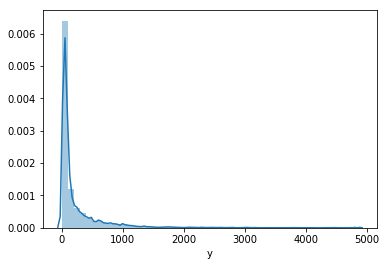

In [56]:
#标签变量直方图
sns.distplot(data_train['y'])

通过以上直方图容易得到，y变量是一个偏斜分布，后续考虑转换为正态分布。

#### 1.3.2 多变量数据分布

a.位置与y变量的箱型图分布

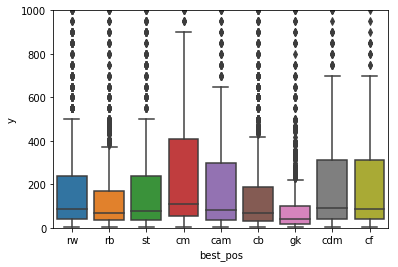

In [70]:
# best_pos 箱型图
var = 'best_pos'
data = pd.concat([data_train['y'], data_train[var]], axis=1)
fig = sns.boxplot(x=var, y="y", data=data)
fig.axis(ymin=0, ymax=1000);

箱型图是在1977年由美国的统计学家约翰·图基(John Tukey)发明的。它由五个数值点组成：最小值(min)，下四分位数(Q1)，中位数(median)，上四分位数(Q3)，最大值(max)。也可以往盒图里面加入平均值(mean)。https://www.cnblogs.com/space-place/p/7643480.html  
由于现实数据中总是存在各式各样地“脏数据”，也成为“离群点”，于是为了不因这些少数的离群数据导致整体特征的偏移，将这些离群点单独汇出，而盒图中的胡须的两级修改成最小观测值与最大观测值。这里有个经验，就是最大(最小)观测值设置为与四分位数值间距离为1.5个IQR(中间四分位数极差)。IQR = Q3-Q1，即上四分位数与下四分位数之间的差，也就是盒子的长度。所以最大值是去除掉离群点后的最大值，最大值上面的点认为是离群点。  
不难得出，cm位置（即中场球员）身价明显更高。


b.最佳位置得分与球员身价散点图分布

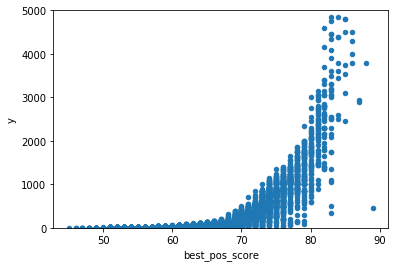

In [71]:
# best_pos_score 散点图
var = 'best_pos_score'
data = pd.concat([data_train['y'], data_train[var]], axis=1)
data.plot.scatter(x=var, y="y", ylim=(0, 5000))

很明显，随着球员能力值的提升，身价也在提高。

c.年龄与身价散点图分布

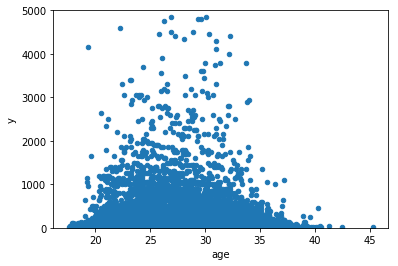

In [74]:
# age 散点图
data = pd.concat([data_train['y'], data_train['age']], axis=1)
data.plot.scatter(x='age', y="y", ylim=(0, 5000))

从以上散点图貌似能够得到年龄与身价没有关系，别急，我们继续往下看。

d.能力值、年龄与身价分布

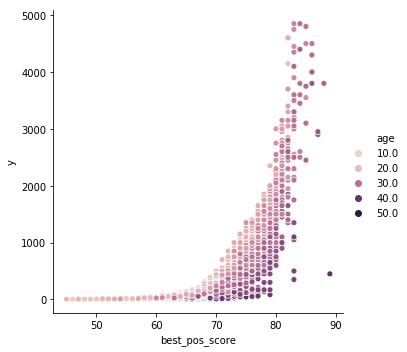

In [75]:
sns.relplot(x='best_pos_score', y='y', hue='age', data=data_train)

在二维图中，可以通过第三个变量给点着色，从而将第三个维度添加到图中。很明细可以得到，年龄与能力值联合影响着身价。随着能力值升高，身价也在变高，但是，能力值变高，年龄也变大后，身价有一定的降低。